In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import datetime
from statistics import stdev
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, precision_recall_curve,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     cross_val_score, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [3]:
emp_data = pd.read_csv("/content/drive/MyDrive/1/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
emp_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
emp_data.shape

(1470, 35)

In [6]:
emp_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
object_columns =emp_data.select_dtypes(include=['object']).columns.tolist()

In [9]:
object_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
emp_dict = {}
for i,col in  enumerate(object_columns):
  emp_dict[object_columns[i]] = emp_data[object_columns[i]].unique()

In [11]:
emp_dict

{'Attrition': array(['Yes', 'No'], dtype=object),
 'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'Over18': array(['Y'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object)}

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

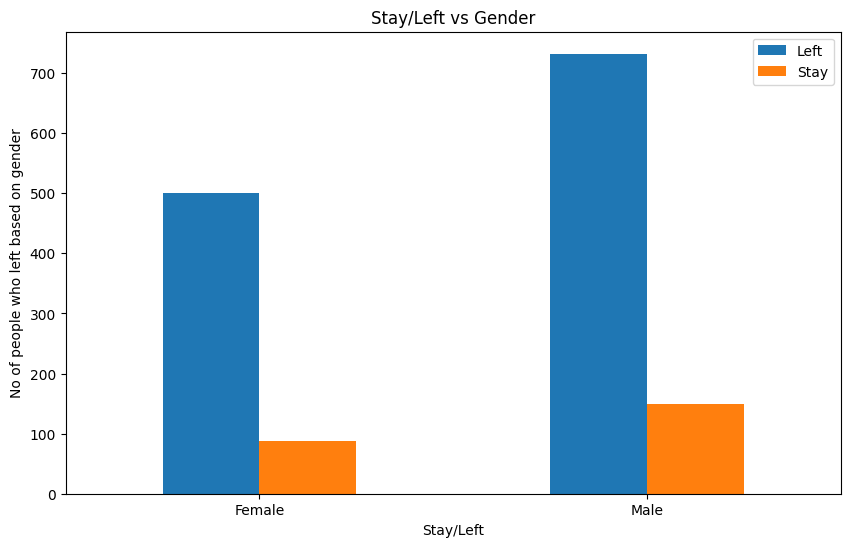

In [12]:
pd.crosstab(emp_data['Gender'],emp_data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

From the chart it is seen that it is depend on male more to stay in the company or leave


In [13]:
func_dict = emp_data["Department"].value_counts()
func_dict

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [14]:
JobRole = emp_data["JobRole"].value_counts()
JobRole

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

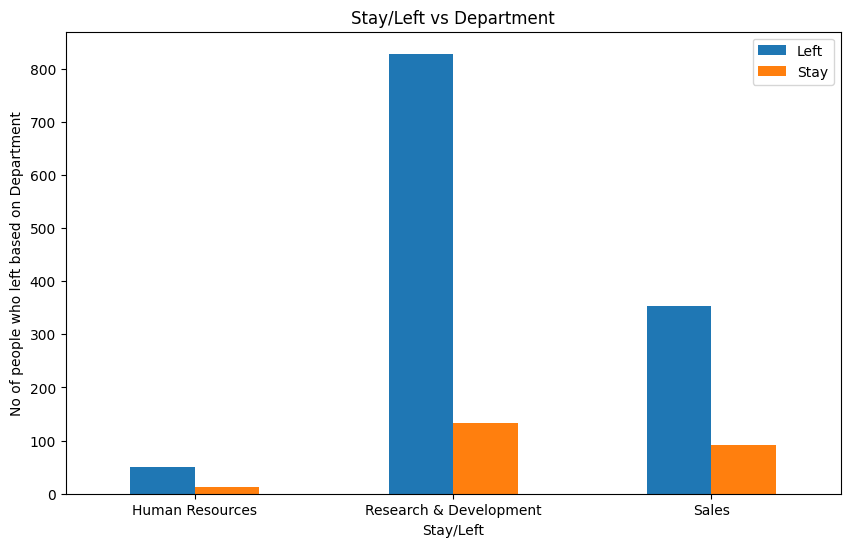

In [15]:
pd.crosstab(emp_data['Department'],emp_data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Department")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

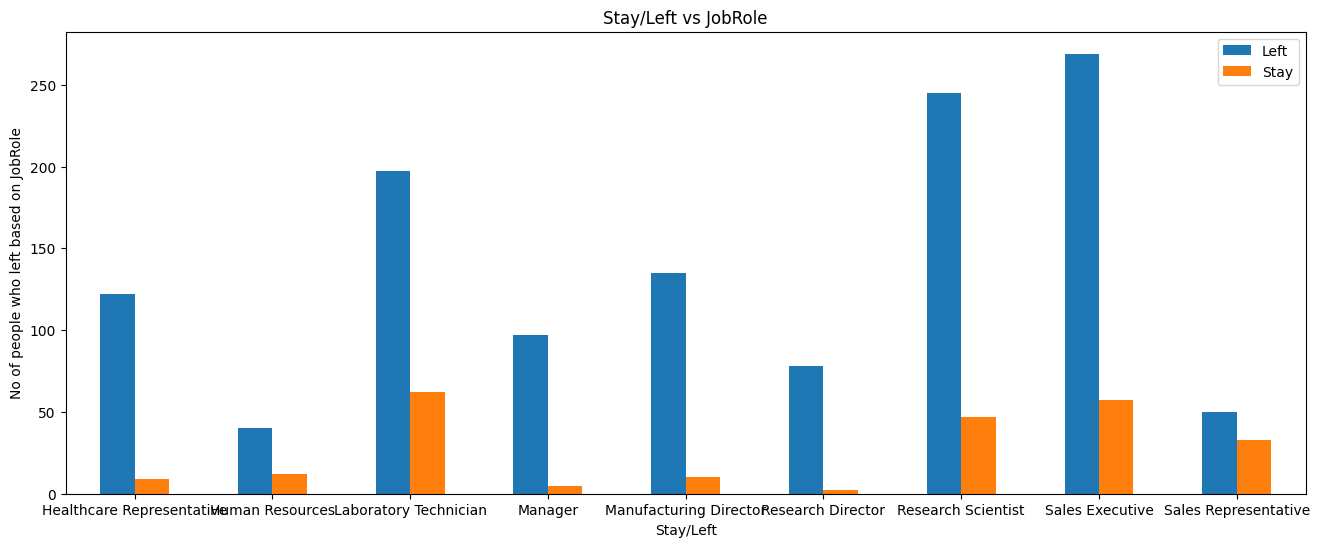

In [16]:
pd.crosstab(emp_data['JobRole'],emp_data['Attrition']).plot(kind="bar",figsize=(16,6))
plt.title("Stay/Left vs JobRole")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on JobRole")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [17]:
#uncessary columns
emp_data = emp_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

In [18]:
emp_data.shape

(1470, 31)

In [19]:
continous_columns =emp_data.select_dtypes(include=['int']).columns.tolist()

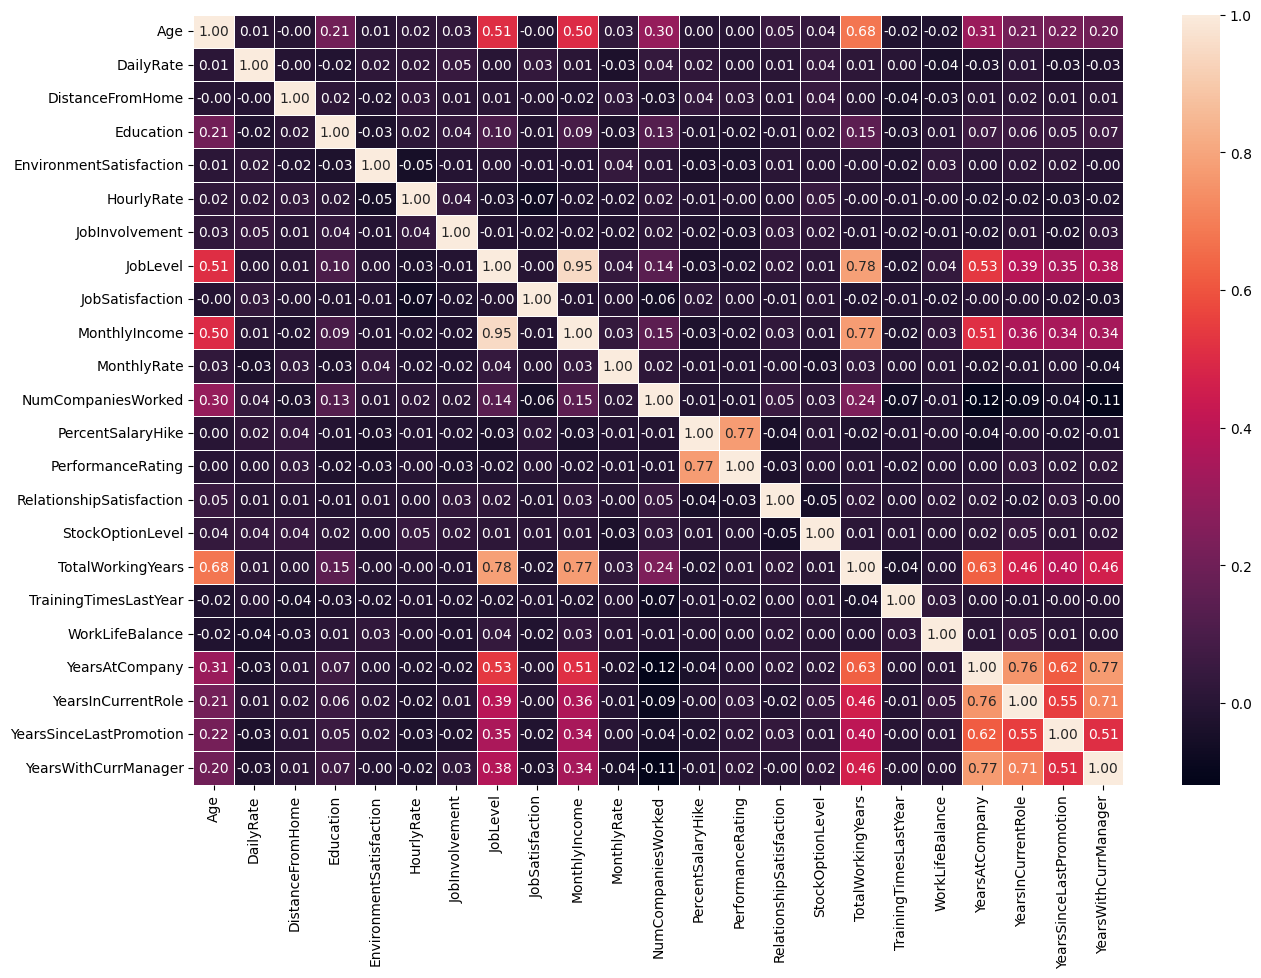

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'emp_data' is your DataFrame and 'continuous_columns' is a list of continuous column names
corr_matrix = emp_data[continous_columns].corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            ax=ax
           )
plt.show()


In [21]:
# Grouping by age and attrition status, counting daily rates, and resetting index

age_att = emp_data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

line_chart = px.line(age_att, x='Age', y='Counts', color='Attrition',
                     title='<b>Age Distribution within Organization with Attriton</b>', height=500,
                     color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

line_chart.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')


line_chart.show()


In [22]:
# Grouping by monthly income and attrition status, counting occurrences, and resetting index
rate_att = emp_data.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Rounding monthly income to the nearest thousand
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)

# Grouping again by rounded monthly income and attrition status, counting occurrences, and resetting index
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Creating the line chart
line_chart = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition',
                     title='<b>Monthly Income-based Counts of People in an Organization</b>', height=500,
                     color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

line_chart.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')
line_chart.show()

In [23]:
# Group data by Department and Attrition, count occurrences, and reset index
dept_att = emp_data.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per department
dept_total_counts = dept_att.groupby('Department')['Counts'].transform('sum')

# Calculate percentage within each department
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Create a bar plot
fig = px.bar(dept_att, x='Department', y='Counts', color='Attrition',
             title='<b>Department-wise Distribution of Employees by Attrition Status</b>',
             text='Percentage', # Use 'Percentage' column as text
             labels={'Counts': 'Count', 'Percentage': 'Percentage'}, height = 500,
            color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%',
                  textposition='outside',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')

fig.show()

In [24]:
# Group data by JobRole and Attrition, calculate count and percentage
attr_job = emp_data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
attr_job['Total'] = attr_job.sum(axis=1)
attr_job['Attrition_Rate'] = attr_job['Yes'] / attr_job['Total'] * 100

attr_job = attr_job.sort_values('Attrition_Rate')

fig = go.Figure()

# Add 'Yes' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=attr_job['Attrition_Rate'],
                     name='Attrition: Yes',
                     orientation='h',
                     marker_color='#C53E4A'))

# Add 'No' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=100 - attr_job['Attrition_Rate'],
                     name='Attrition: No',
                     orientation='h',
                     marker_color='#419D9D'))

fig.update_layout(
    title='<b>Attrition by Job Role</b>',
    title_x=0.5,
    xaxis_title='Attrition Rate (%)',
    yaxis_title='Job Role',
    barmode='relative',
    bargap=0.1,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center',  x=0.50),
    height=500,
    font_color='#28221D',
    paper_bgcolor='#EADFC7',
    plot_bgcolor='#EADFC7'
)

fig.show()

In [25]:
hike_att = emp_data.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

line_plot = px.line(hike_att, x='PercentSalaryHike', y='Counts', color='Attrition',
                    title='<b>Distribution of Salary Hike Percentages Among Employees</b>', height=500,
                    color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})

line_plot.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_plot.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')

line_plot.show()

In [26]:
promotion_att = emp_data.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(promotion_att, x='PercentSalaryHike', y='Counts', color='Attrition',
              title='<b>Percent Salary Hike of Employees in the Organization</b>', height=500,
              color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

fig.update_traces(texttemplate='%{text:.2f}%',
                  textposition='top center',
                  textfont_size=14,
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5,
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')

fig.show()

In [27]:
emp_data_copy = emp_data.copy()

In [28]:
# object_columns.remove('Over18')
object_columns.remove("Over18")

In [29]:
#continous_col - int , object_col-cat
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(object_columns):
    if type(emp_data_copy[i][0]) == str:
        text_categorical_features.append(i)
        emp_data_copy[i] = le.fit_transform(emp_data_copy[i])
        l1.append(list(emp_data_copy[i].unique())); l2.append(list(le.inverse_transform(emp_data_copy[i].unique())))
        print(i,' : ',emp_data_copy[i].unique(),' = ',le.inverse_transform(emp_data_copy[i].unique()))

Label Encoder Transformation


100%|██████████| 8/8 [00:00<00:00, 168.16it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [30]:
emp_data_copy

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [31]:
corr = emp_data_copy.corr().round(2)

# Create annotated heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr.to_numpy(),
    x=corr.index.tolist(),
    y=corr.columns.tolist(),
    colorscale='GnBu',
    hovertemplate="Correlation between %{x} and %{y} = %{z}"
))

# Create annotations
annotations = []
for i, row in enumerate(corr.index):
    for j, value in enumerate(corr.iloc[i]):
        annotations.append(dict(
            x=corr.columns[j],
            y=corr.index[i],
            text=str(value),
            xref='x',
            yref='y',
            font=dict(color='white' if abs(value) > 0.5 else 'black'),  # Color based on value
            showarrow=False))

# Add annotations to the figure
fig.update_layout(annotations=annotations)

# Update layout
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="<b>Correlation Matrix of Employee Attrition</b>",
    height=800,
    title_x=0.5,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
    font_color='#28221D',
    paper_bgcolor='#EADFC7',
    plot_bgcolor='#EADFC7')

fig.show()

In [32]:
#Treating imbalance data
emp_cp = emp_data_copy.copy()

In [33]:
attrition_counts = emp_cp['Attrition'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = attrition_counts[0] / attrition_counts[1]

print("Imbalance Ratio (Retained Employees : Attrited Employees): {:.2f} : 1".format(imbalance_ratio))

Imbalance Ratio (Retained Employees : Attrited Employees): 5.20 : 1


In [34]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

cols = list(emp_cp.columns)
cols.remove('Attrition')

# Original class distribution
print("Original class distribution:")
print(Counter(emp_cp['Attrition']))

# SMOTE oversampling
over_sampler = SMOTE(sampling_strategy=0.85)
under_sampler = RandomUnderSampler(sampling_strategy='auto')  # Set sampling_strategy to 'majority'

# Oversampling pipeline
oversampling_steps = [('over', over_sampler)]
oversampling_pipeline = Pipeline(steps=oversampling_steps)
X_resampled, y_resampled = oversampling_pipeline.fit_resample(emp_cp.loc[:, cols], emp_cp.loc[:, 'Attrition'])

# Class distribution after oversampling
print("\nClass distribution after oversampling:")
print(Counter(y_resampled))

# Undersampling pipeline
undersampling_steps = [('under', under_sampler)]
undersampling_pipeline = Pipeline(steps=undersampling_steps)
X_resampled_final, y_resampled_final = undersampling_pipeline.fit_resample(X_resampled, y_resampled)

# Class distribution after undersampling
print("\nClass distribution after undersampling:")
print(Counter(y_resampled_final))

Original class distribution:
Counter({0: 1233, 1: 237})

Class distribution after oversampling:
Counter({0: 1233, 1: 1048})

Class distribution after undersampling:
Counter({0: 1048, 1: 1048})


In [35]:
# Data is now prepared for train test split
from sklearn.model_selection import train_test_split

# Split the resampled data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled_final, y_resampled_final, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1676, 30)
Shape of x_test: (420, 30)
Shape of y_train: (1676,)
Shape of y_test: (420,)


In [36]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

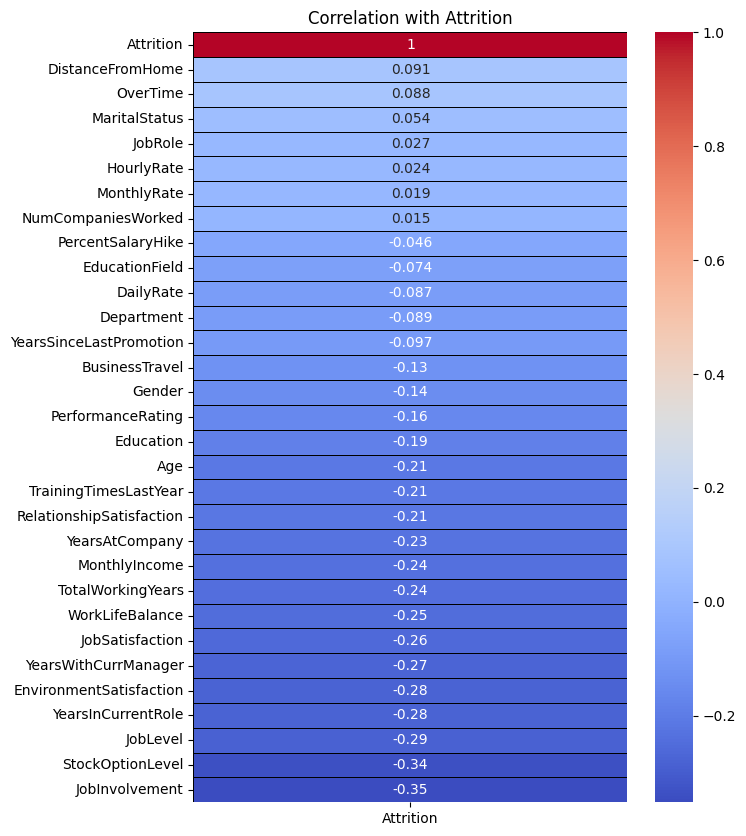

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation with Attrition
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending=False).to_frame()
corr.columns = ['Attrition']

# Plot heatmap
plt.subplots(figsize=(7, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')  # Example colormap: 'coolwarm'
plt.title('Correlation with Attrition')
plt.show()


In [38]:
object_columns.remove('Attrition')

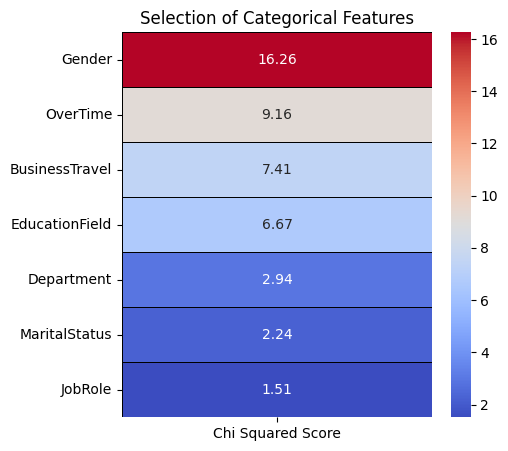

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = x_train.loc[:, object_columns]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

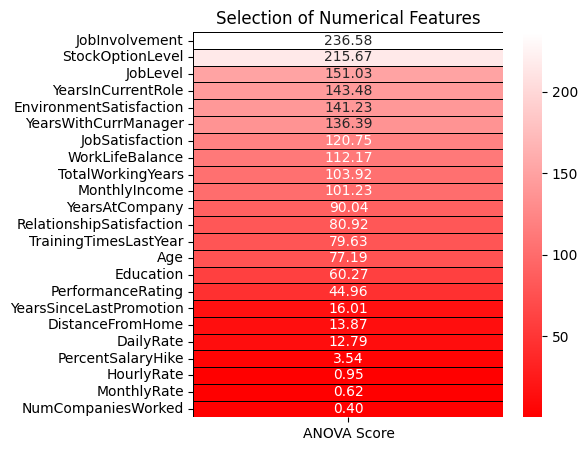

In [40]:
# Define custom colormap with two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "white"])

from sklearn.feature_selection import SelectKBest, f_classif

features = x_train.loc[:, continous_columns]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=custom_cmap, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


In [41]:
x_train = x_train.drop(columns = ['Gender', 'BusinessTravel', 'EducationField', 'OverTime', 'Department',
                                  'MaritalStatus', 'JobRole', 'YearsSinceLastPromotion', 'DailyRate',
                                  'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate',
                                  'MonthlyRate'])

x_test = x_test.drop(columns = ['Gender', 'BusinessTravel', 'EducationField', 'OverTime', 'Department',
                                  'MaritalStatus', 'JobRole', 'YearsSinceLastPromotion', 'DailyRate',
                                  'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate',
                                  'MonthlyRate'])

In [42]:
mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

# Columns to be transformed
columns_to_transform = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                        'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction',
                        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Applying transformation to each column
for col in columns_to_transform:
    if col in ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']:
        x_train[col] = mms.fit_transform(x_train[[col]])
        x_test[col] = mms.transform(x_test[[col]])
    else:
        x_train[col] = ss.fit_transform(x_train[[col]])
        x_test[col] = ss.transform(x_test[[col]])


In [43]:
mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

# Columns to be transformed
columns_to_transform = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                        'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction',
                        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Applying transformation to each column
for col in columns_to_transform:
    if col in ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']:
        x_train[col] = mms.fit_transform(x_train[[col]])
        x_test[col] = mms.transform(x_test[[col]])
    else:
        x_train[col] = ss.fit_transform(x_train[[col]])
        x_test[col] = ss.transform(x_test[[col]])


In [44]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Compute ROC curve and ROC area for each class
    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

Cross Validation Score: 91.35%
ROC_AUC Score: 86.68%


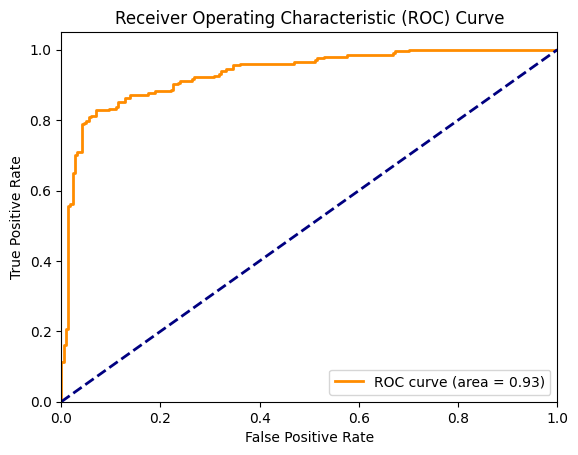

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       217
           1       0.86      0.87      0.86       203

    accuracy                           0.87       420
   macro avg       0.87      0.87      0.87       420
weighted avg       0.87      0.87      0.87       420



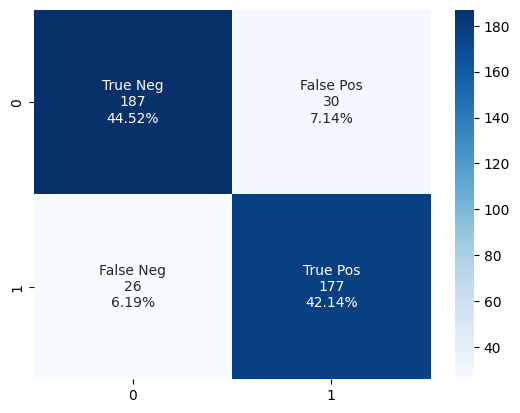

In [45]:
classifier_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
model(classifier_xgb, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_xgb, x_test.values, y_test.values)

Cross Validation Score: 80.65%
ROC_AUC Score: 80.34%


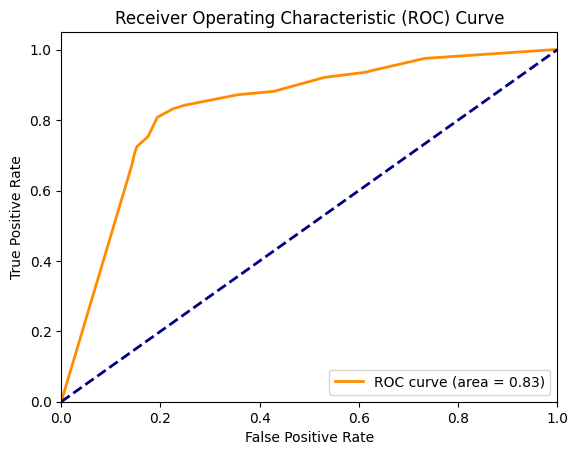

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       217
           1       0.78      0.83      0.80       203

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



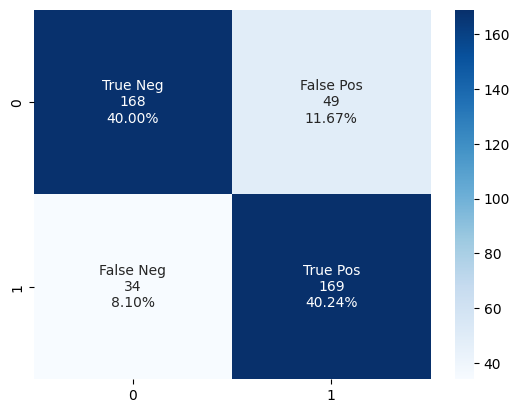

In [46]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

Cross Validation Score: 88.26%
ROC_AUC Score: 81.50%


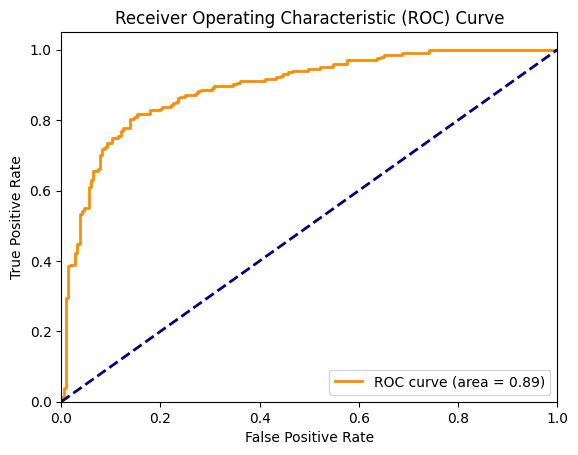

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       217
           1       0.79      0.84      0.81       203

    accuracy                           0.81       420
   macro avg       0.81      0.82      0.81       420
weighted avg       0.82      0.81      0.81       420



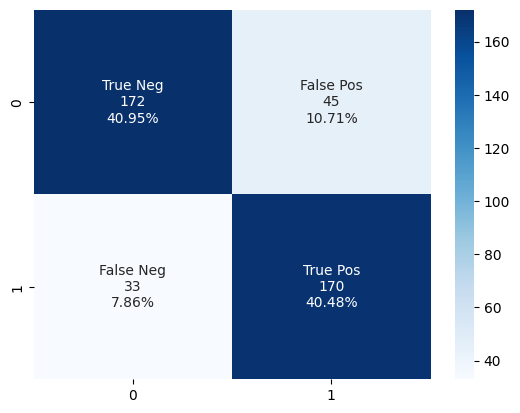

In [47]:
classifier_lr = LogisticRegression()
model(classifier_lr, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_lr, x_test.values, y_test.values)

Cross Validation Score: 90.38%
ROC_AUC Score: 84.98%


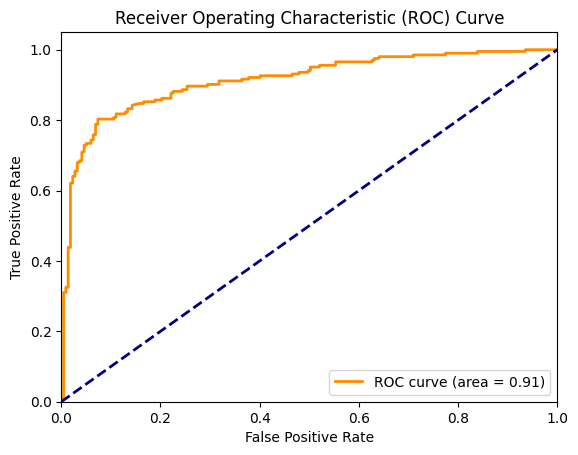

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       217
           1       0.85      0.84      0.84       203

    accuracy                           0.85       420
   macro avg       0.85      0.85      0.85       420
weighted avg       0.85      0.85      0.85       420



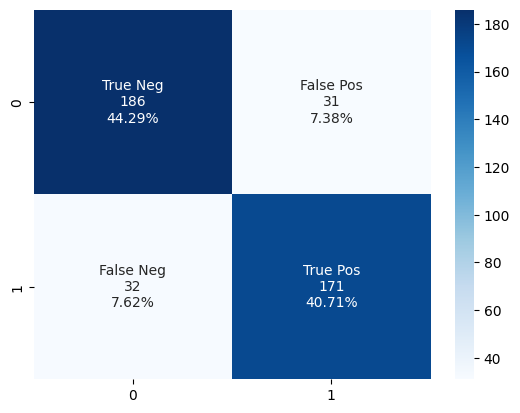

In [48]:
classifier_svm = SVC(probability=True)  # Note: SVM needs probability=True to enable predict_proba
model(classifier_svm, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_svm, x_test.values, y_test.values)

Cross Validation Score: 88.81%
ROC_AUC Score: 82.63%


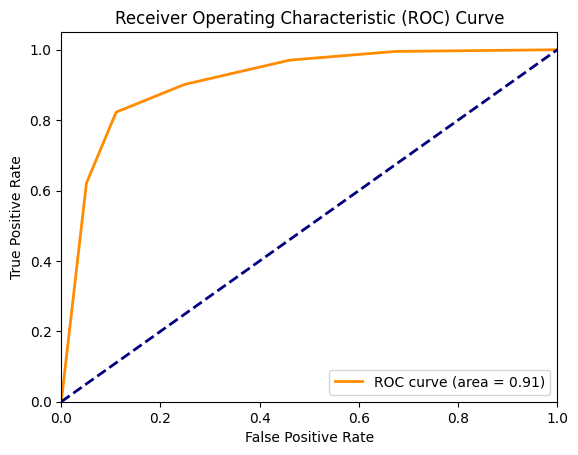

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       217
           1       0.77      0.90      0.83       203

    accuracy                           0.82       420
   macro avg       0.83      0.83      0.82       420
weighted avg       0.83      0.82      0.82       420



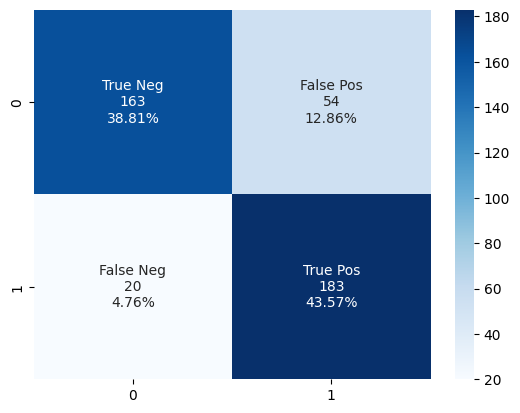

In [50]:
warnings.filterwarnings('ignore')

classifier_knn = KNeighborsClassifier()
model(classifier_knn, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_knn, x_test.values, y_test.values)

In [51]:
model_scores = {
    "Model": ["XGBoost (XGB)", "SVM", "Decision Tree", "Random Forest", "KNN", "Logistic Regression"],
    "Cross Validation Score": ["91.40%", "90.77%", "91.74%", "88.19%", "89.19%", "87.50%"],
    "ROC-AUC": ["84.10%", "83.53%", "77.66%", "80.64%", "80.07%", "78.36%"],
    "F1 Score (Attrition)": [0.84, 0.83, 0.77, 0.80, 0.81, 0.78],
    "F1 Score (No Attrition)": [0.84, 0.84, 0.78, 0.82, 0.78, 0.79]
}

df = pd.DataFrame(model_scores)

df

,Model,Cross Validation Score,ROC-AUC,F1 Score (Attrition),F1 Score (No Attrition)
0,XGBoost (XGB),91.40%,84.10%,0.84,0.84
1,SVM,90.77%,83.53%,0.83,0.84
2,Decision Tree,91.74%,77.66%,0.77,0.78
3,Random Forest,88.19%,80.64%,0.80,0.82
4,KNN,89.19%,80.07%,0.81,0.78
5,Logistic Regression,87.50%,78.36%,0.78,0.79
